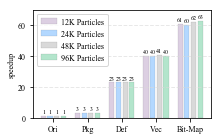

In [3]:
#! /usr/bin/env python# -*- coding: utf-8 -*-
import sys 
reload(sys) 
sys.setdefaultencoding('utf8')
"""
绘制加速比柱状图
Author：shaomingshan
Input：
    version：需要对比的版本
    speedup：加速比
"""


import matplotlib.pyplot as plt
import numpy as np


version = ['Ori', 'Pkg', 'Def', 'Vec', 'Bit-Map']
speedup1 = [1, 3, 23, 40, 61]
speedup_map1 = [0] * len(speedup1)
speedup2 = [1, 3, 23, 40, 60]
speedup_map2 = [0] * len(speedup2)
speedup3 = [1, 3, 23, 41, 62]
speedup_map3 = [0] * len(speedup3)
speedup4 = [1, 3, 23, 40, 63]
speedup_map4 = [0] * len(speedup4)

# margin_top = 1  # log2
# text_gap = 0.4
margin_top = 9  # real yticks
text_gap = 5
# width, height = 3.3, 2.83  # inch
width, height = 3.3, 2  # inch
title = u''
xlabel = u''
ylabel = u'speedup'
bar_width = 0.15
gap_width = 1.3 * bar_width
text_size = 8
font_size = 6
legend1 = '12K Particles'
legend2 = '24K Particles'
legend3 = '48K Particles'
legend4 = '96K Particles'
# color1 = '#d98c8c'  # 红
# color2 = '#dae8fc'  # 蓝
# color3 = '#f7e8b1'  # 黄
# color4 = '#d5e8d4'  # 绿

# color1 = '#e1d5e7'  # 紫
# color2 = '#9fbfdf'  # 蓝
# color3 = '#eeeeee'  # 灰
# color4 = '#b3e5cc'  # 绿

# color1 = '#d0beda'  # 紫
# color2 = '#9fbfdf'  # 蓝
# color3 = '#d9d9d9'  # 灰
# color4 = '#b3e5cc'  # 绿

color1 = '#dccfe2'  # 紫
color2 = '#b3d8ff'  # 蓝
color3 = '#d9d9d9'  # 灰
color4 = '#b3e5cc'  # 绿

grid_color = '#d9d9d9'
alpha = 1.0

linewidth = 0.1
edgecolor = "#4d4d4d"


def get_max(data):
    max_num = float('-inf')
    for i in data:
        max_num = i if i > max_num else max_num
    return max_num


def log2(my_speedup):
    return np.log2(my_speedup)


def draw(save_path):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

    plt.figure().set_size_inches(width, height)
    plt.subplots_adjust(left=0.15, bottom=0.13)

    left1 = range(len(version))
    left2 = [x + 1 * gap_width for x in range(len(version))]
    left3 = [x + 2 * gap_width for x in range(len(version))]
    left4 = [x + 3 * gap_width for x in range(len(version))]
    plt.bar(left1, speedup_map1, width=bar_width, color=color1, alpha=alpha,
            label=legend1, edgecolor=edgecolor, linewidth=linewidth, zorder=0)
    plt.bar(left2, speedup_map2, width=bar_width, color=color2, alpha=alpha,
            label=legend2, edgecolor=edgecolor, linewidth=linewidth, zorder=0)
    plt.bar(left3, speedup_map3, width=bar_width, color=color3, alpha=alpha,
            label=legend3, edgecolor=edgecolor, linewidth=linewidth, zorder=0)
    plt.bar(left4, speedup_map4, width=bar_width, color=color4, alpha=alpha,
            label=legend4, edgecolor=edgecolor, linewidth=linewidth, zorder=0)

    # 补-1到0之间gap
    # gap_bar = [-1, -1, -1, -1, -1]
    # plt.bar(left1, gap_bar, width=bar_width,
    #         color=color1, alpha=alpha, zorder=0)
    # plt.bar(left2, gap_bar, width=bar_width,
    #         color=color2, alpha=alpha, zorder=0)
    # plt.bar(left3, gap_bar, width=bar_width,
    #         color=color3, alpha=alpha, zorder=0)
    # plt.bar(left4, gap_bar, width=bar_width,
    #         color=color4, alpha=alpha, zorder=0)

    for x, y1, y2, y3, y4, v1, v2, v3, v4 in zip(np.arange(len(speedup1)), speedup_map1, speedup_map2, speedup_map3,
                                                 speedup_map4, speedup1, speedup2, speedup3, speedup4):
        plt.text(x, y1+text_gap, v1, ha='center', va='top', fontsize=font_size)  # 保留两位小数
        plt.text(x+1*gap_width, y2+text_gap, v2, ha='center', va='top', fontsize=font_size)  # 保留两位小数
        plt.text(x+2*gap_width, y3+text_gap, v3, ha='center', va='top', fontsize=font_size)  # 保留两位小数
        plt.text(x+3*gap_width, y4+text_gap, v4, ha='center', va='top', fontsize=font_size)  # 保留两位小数

    # y label
    plt.text(-0.94, (get_max(speedup_map1) + margin_top) / 2,
             ylabel, ha='center', va='center', fontsize=text_size, rotation=90)

    plt.title(title)
    plt.tick_params(labelsize=text_size)

    plt.grid(axis='y', linestyle='--', linewidth=1, c=grid_color, alpha=0.6, zorder=-10)
    plt.legend(loc='upper left', fontsize=8,
               borderpad=0.5, borderaxespad=0.5,
               handletextpad=0.5, handlelength=2)
    plt.ylim(0, get_max(speedup_map1) + margin_top)
    # plt.yticks([-1, 0, 1, 2, 3, 4, 5, 6], [0.5, 1, 2, 4, 8, 16, 32, 64])
    plt.xticks([index + gap_width/2 for index in left2], version)

    plt.savefig(save_path)
    plt.show()


if __name__ == '__main__':
    # speedup_map1 = log2(speedup1)
    speedup_map1 = speedup1
    print(speedup_map1)
    # speedup_map2 = log2(speedup2)
    speedup_map2 = speedup2
    print(speedup_map2)
    # speedup_map3 = log2(speedup3)
    speedup_map3 = speedup3
    print(speedup_map3)
    # speedup_map4 = log2(speedup4)
    speedup_map4 = speedup4
    print(speedup_map4)

    file = 'kernel_speedup.pdf'
    draw(file)
